# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
cd

C:\Users\Thoma


In [290]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key= "412d8b2ba2dc8a6a229f2673017d9807"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [291]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

In [202]:
cities_df = pd.DataFrame({"City": cities})
cities_df.head()

,City
0,sola
1,ushuaia
2,avarua
3,rawannawi
4,albany


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [338]:
#build df for request returns
column_names = ["City","Cloudiness", "Country","Humidity","Lat","Lng",
                "Max Temp", "Wind Speed"]
new_cities_df = pd.DataFrame(columns = column_names)
 
#row count

row_count = 1

#query url        
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url =  f"{url}appid={api_key}&units={units}&q="
print("Beginning Data Retrieval")
    # Loop through API for info request
for index, row in cities_df.iterrows():
        
 #JSONify results
    weather_by_city = requests.get(query_url + row["City"]).json()
    #weather_by_city.keys()
    
    if weather_by_city["cod"]== "404":
        print("City not found, skipping...") 
    
    

    else:
            new_cities_df.set_value(index, "City", weather_by_city["name"])
            new_cities_df.set_value(index, "Country", weather_by_city["sys"]["country"])
            new_cities_df.set_value(index,"Lat", weather_by_city['coord']['lat'])   
            new_cities_df.set_value(index,"Max Temp", weather_by_city["main"]['temp_max'])
            new_cities_df.set_value(index,"Humidity", weather_by_city['main']['humidity'])
            new_cities_df.set_value(index,"Cloudiness", weather_by_city['clouds']['all'])
            new_cities_df.set_value(index,"Wind Speed", weather_by_city['wind']['speed'])
            new_cities_df.set_value(index,"Lng", weather_by_city['coord']["lon"])
            
#Print log
   
            print("---------------------------------------------")
            print("Processing Record " + str(row_count) +  " of Set "  + str(row_count) + " | " + weather_by_city["name"] )
            print(query_url)
            row_count += 1
       

     


Beginning Data Retrieval


C:\Users\Thoma\Anaconda3b\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Thoma\Anaconda3b\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Thoma\Anaconda3b\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Thoma\Anaconda3b\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Thoma\Anaconda3b\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Thoma\Anaconda3b

---------------------------------------------
Processing Record 1 of Set 1 | Sola
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 2 of Set 2 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 3 of Set 3 | Avarua
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 4 of Set 4 | Albany
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 5 of Set 5 | Tautira
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------

---------------------------------------------
Processing Record 43 of Set 43 | Kaitangata
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 44 of Set 44 | Alofi
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 45 of Set 45 | Dikson
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 46 of Set 46 | Hudson Bay
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 47 of Set 47 | San Patricio
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
--------------------------------

City not found, skipping...
---------------------------------------------
Processing Record 87 of Set 87 | Rawson
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 88 of Set 88 | New Norfolk
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 89 of Set 89 | Souillac
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 90 of Set 90 | Castro
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 91 of Set 91 | Saint-Philippe
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
--

---------------------------------------------
Processing Record 129 of Set 129 | Nortelandia
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 130 of Set 130 | Hearst
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 131 of Set 131 | Longyearbyen
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 132 of Set 132 | Trincomalee
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 133 of Set 133 | Leningradskiy
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not fou

---------------------------------------------
Processing Record 170 of Set 170 | Yomou
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not found, skipping...
City not found, skipping...
---------------------------------------------
Processing Record 171 of Set 171 | Arraial do Cabo
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 172 of Set 172 | Aden
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 173 of Set 173 | Ferme-Neuve
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 174 of Set 174 | Novoagansk
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6

---------------------------------------------
Processing Record 212 of Set 212 | San Vicente
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 213 of Set 213 | Timizart
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 214 of Set 214 | Bucuresci
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 215 of Set 215 | Olinda
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 216 of Set 216 | Tura
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------

---------------------------------------------
Processing Record 254 of Set 254 | Santiago de Cao
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 255 of Set 255 | Kiruna
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 256 of Set 256 | Joinville
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 257 of Set 257 | Nizwa
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 258 of Set 258 | Borisoglebsk
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Im

---------------------------------------------
Processing Record 295 of Set 295 | Mackay
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 296 of Set 296 | Vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 297 of Set 297 | Kavieng
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 298 of Set 298 | Faanui
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 299 of Set 299 | Aurora
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
--------------------------

---------------------------------------------
Processing Record 337 of Set 337 | Bethel
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 338 of Set 338 | Mogadishu
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 339 of Set 339 | Fria
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 340 of Set 340 | Ryki
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 341 of Set 341 | Esperance
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------

---------------------------------------------
Processing Record 379 of Set 379 | Vila
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 380 of Set 380 | Kjollefjord
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 381 of Set 381 | Poum
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 382 of Set 382 | Jacareacanga
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 383 of Set 383 | Imperial Beach
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not found, skip

---------------------------------------------
Processing Record 420 of Set 420 | Malyn
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 421 of Set 421 | Hofn
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 422 of Set 422 | Vestmanna
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 423 of Set 423 | Popondetta
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 424 of Set 424 | Aksarka
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
------------------------------

---------------------------------------------
Processing Record 462 of Set 462 | Jeremie
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 463 of Set 463 | Saldanha
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 464 of Set 464 | Blanquefort
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 465 of Set 465 | Nouadhibou
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 466 of Set 466 | Gigmoto
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
----------------------

---------------------------------------------
Processing Record 504 of Set 504 | Lapua
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 505 of Set 505 | Ust-Kuyga
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 506 of Set 506 | Rzeszow
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 507 of Set 507 | Gawler
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 508 of Set 508 | Colorado
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
------------------------------

---------------------------------------------
Processing Record 546 of Set 546 | Kieta
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 547 of Set 547 | San Blas
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 548 of Set 548 | Casteldaccia
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
---------------------------------------------
Processing Record 549 of Set 549 | Tres Arroyos
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 550 of Set 550 | Camacha
https://api.openweathermap.org/data/2.5/weather?appid=412d8b2ba2dc8a6a229f2673017d9807&units=Imper

In [264]:
weather_by_city

{'coord': {'lon': 5.65, 'lat': 58.89},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 32.25,
  'pressure': 1020,
  'humidity': 86,
  'temp_min': 30.2,
  'temp_max': 33.8},
 'visibility': 10000,
 'wind': {'speed': 2.24},
 'clouds': {'all': 90},
 'dt': 1543204200,
 'sys': {'type': 1,
  'id': 5343,
  'message': 0.0053,
  'country': 'NO',
  'sunrise': 1543218820,
  'sunset': 1543244115},
 'id': 3137942,
 'name': 'Sola',
 'cod': 200}

In [286]:
new_cities_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sola,90,NO,86,58.89,5.65,33.8,3.36
1,Ushuaia,75,AR,65,-54.81,-68.31,46.4,14.99
2,Avarua,20,CK,65,-21.21,-159.78,80.6,5.82
4,Albany,90,US,95,42.65,-73.75,37.94,2.15
5,Tautira,75,PF,78,-17.73,-149.15,82.4,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [287]:
new_cities_df.to_csv("Weather_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

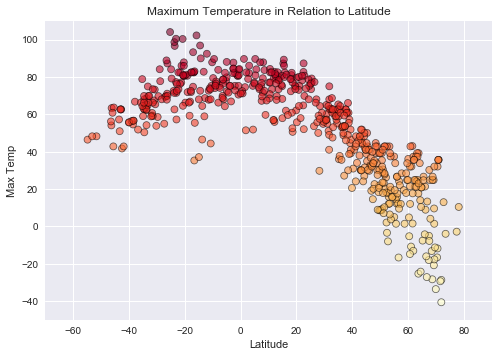

In [340]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Max Temp"], c=new_cities_df["Max Temp"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='YlOrRd', alpha=0.6, label="City")

# Incorporate the other graph properties
plt.title(f"Maximum Temperature in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim([-70, 90])
plt.ylim([-50, 110])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

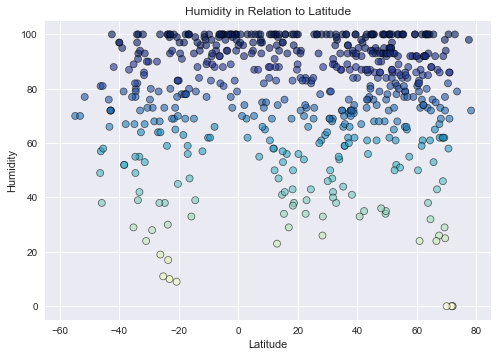

In [341]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Humidity"], c=new_cities_df["Humidity"],
            edgecolor="black", linewidths=.75, marker="o", 
            cmap='YlGnBu', alpha=0.6, label="City")

#graph properties
plt.title(f"Humidity in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim([-65, 85])
plt.ylim([-5, 105])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

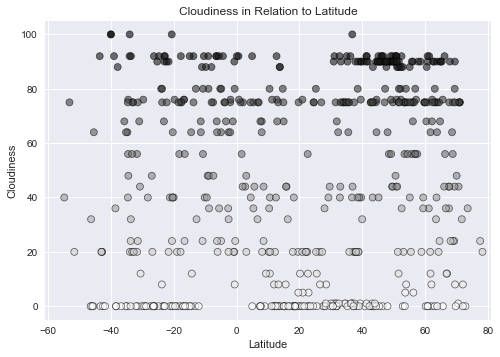

In [342]:
plt.scatter(new_cities_df["Lat"],new_cities_df["Cloudiness"], c=new_cities_df["Cloudiness"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='binary', alpha=0.6, label="City")

#graph properties
plt.title(f"Cloudiness in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim([-61, 81])
plt.ylim([-5, 105])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

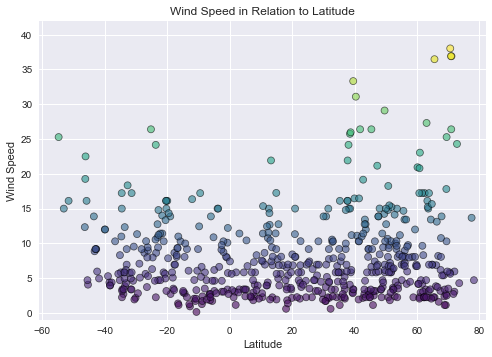

In [343]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Wind Speed"], c=new_cities_df["Wind Speed"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='viridis', alpha=0.6, label="City")

# Incorporate the other graph properties
plt.title(f"Wind Speed in Relation to Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-61, 82])
plt.ylim([-1, 42])

# Save the figure
plt.savefig("Latitude_v_Wind_Speed.png")

# Show plot
plt.show()